<a href="https://colab.research.google.com/github/nserdyukov/AIPD/blob/main/%D0%9B%D0%A011_%D0%A1%D0%B5%D1%80%D0%B4%D1%8E%D0%BA%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Лабораторная работа 11
## Метрические методы классификации

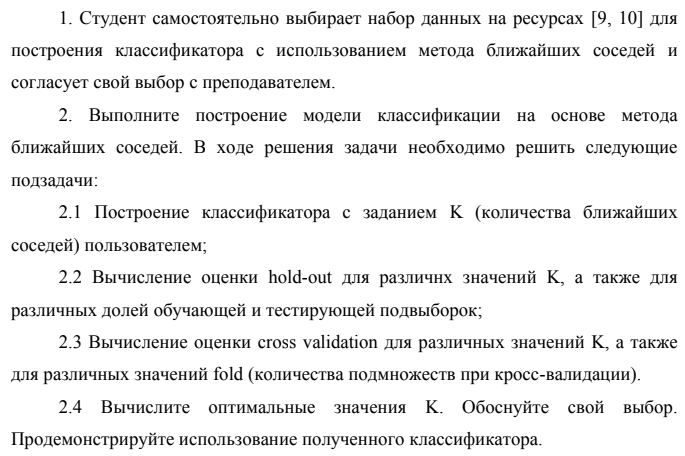

In [ ]:
# Подгрузка данных
!wget https://raw.githubusercontent.com/nserdyukov/rice_dataset/refs/heads/main/rice

--2024-12-19 23:42:33--  https://raw.githubusercontent.com/nserdyukov/rice_dataset/refs/heads/main/rice
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3370 (3.3K) [text/plain]
Saving to: ‘rice’

rice                100%[===================>]   3.29K  --.-KB/s    in 0s      

2024-12-19 23:42:33 (38.0 MB/s) - ‘rice’ saved [3370/3370]



In [ ]:
import pandas as pd
import numpy as np

data_source = 'rice'
d = pd.read_table(data_source, delimiter=',',
                  header=None,
                  names=['id','Area','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Extent','Perimeter','Roundness','AspectRation','Class'])
d.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,10407,4868,145.568204,43.019209,0.955335,4960,78.728204,0.422790,316.465,0.610814,3.383795,1
1,10408,6170,164.043222,48.476178,0.955340,6380,88.633447,0.491399,354.387,0.617361,3.383997,1
2,10409,6154,164.359482,48.568690,0.955342,6305,88.518451,0.420585,360.455,0.595203,3.384063,1
3,10410,10076,164.254703,79.371008,0.875499,10445,113.265889,0.610667,414.635,0.736489,2.069455,0
4,10411,6275,166.306520,49.134183,0.955360,6529,89.384440,0.617132,370.048,0.575847,3.384742,1


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               30 non-null     int64  
 1   Area             30 non-null     int64  
 2   MajorAxisLength  30 non-null     float64
 3   MinorAxisLength  30 non-null     float64
 4   Eccentricity     30 non-null     float64
 5   ConvexArea       30 non-null     int64  
 6   EquivDiameter    30 non-null     float64
 7   Extent           30 non-null     float64
 8   Perimeter        30 non-null     float64
 9   Roundness        30 non-null     float64
 10  AspectRation     30 non-null     float64
 11  Class            30 non-null     int64  
dtypes: float64(8), int64(4)
memory usage: 2.9 KB


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The markers list has more values (3) than needed (2), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615:

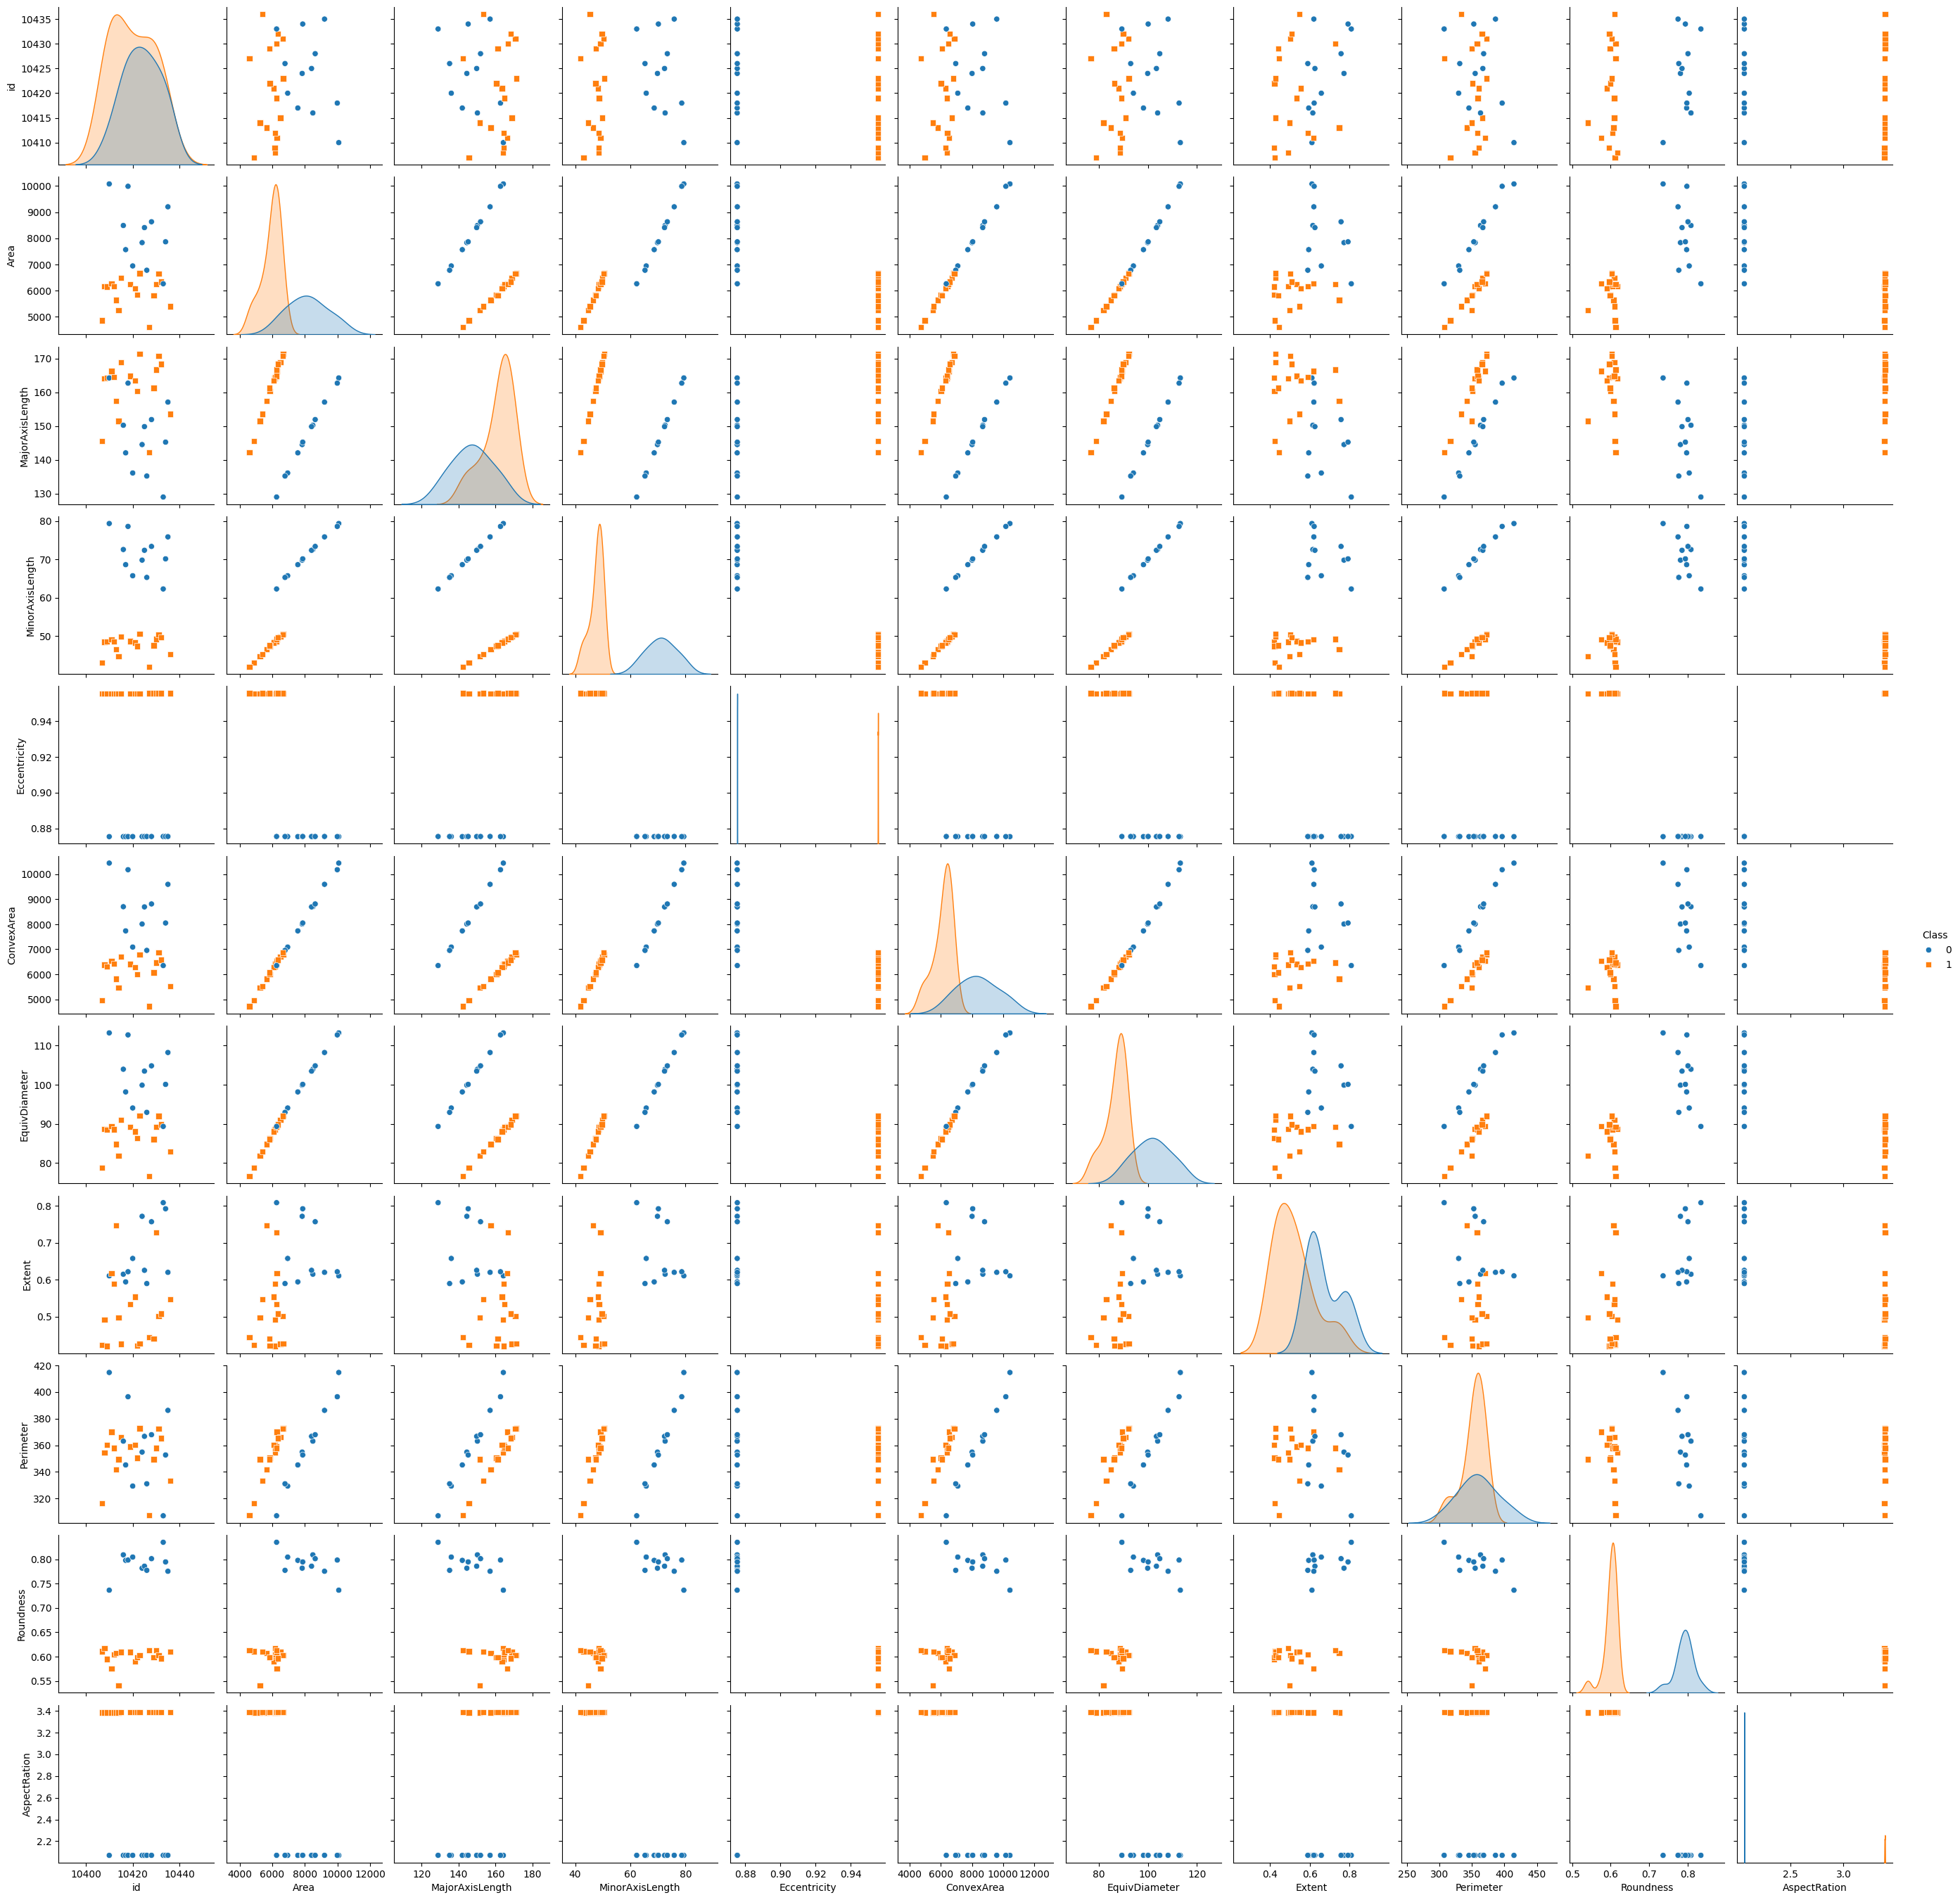

In [ ]:
import seaborn as sb
%matplotlib inline
sb.pairplot(d, hue='Class', markers=["o", "s", "D"])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train = d[['Area','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Extent','Perimeter','Roundness','AspectRation']]
y_train = d['Class']

K = 3

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train.values, y_train)

# Использование классификатора
# Объявление признаков объекта
X_test = np.array([[7834,144.5051815,69.81911157,0.8755365942,8010,99.77908606,0.7779211823,353.898,0.6666629681,2.061524457]])
# Получение ответа для нового объекта
target = knn.predict(X_test)
print(target)


[0]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = train_test_split(
    d.iloc[ :, 1:10 ],
    d['Class'],
    test_size=0.3,
    random_state=17)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.8888888888888888


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 214, in _get_response_values
    y_pred = prediction_method(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 274, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neig

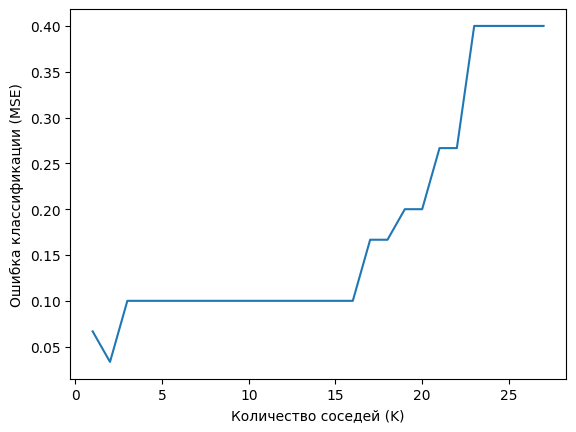

Оптимальные значения K:  [2]


In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра K
k_list = list(range(1,50))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, d.iloc[ : , 1:10 ], d['Class'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)


Палитры, которые можно использовать для визуализации

In [ ]:
print(sorted(list(plt.colormaps)))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cu

In [ ]:
dX = d.iloc[:, 1:5]  # Берем первые 4 признака ('Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity')
dy = d['Class']  # Столбец с классами

# Параметры для визуализации
plot_markers = ['r*', 'g^', 'bo']  # Маркеры для классов
answers = dy.unique()  # Уникальные классы

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(4, 4, figsize=(16, 16))

fmin = dX.min() - 0.5
fmax = dX.max() + 0.5
plot_step = 0.05

# Обходим все subplot
for i in range(0, 4):
    for j in range(0, 4):

        # Строим решающие границы
        if i != j:
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                                 np.arange(fmin[j], fmax[j], plot_step))
            model = KNeighborsClassifier(n_neighbors=13)
            model.fit(dX.iloc[:, [i, j]].values, dy)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)

            # Преобразуем предсказания в индексы классов
            for k, ans in enumerate(answers):
                p[p == ans] = k
            p = p.astype('int32')

            places[i, j].contourf(xx, yy, p, cmap='Pastel1')

        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i == j:
                places[i, j].hist(dX.iloc[idx].iloc[:, i],
                                  color=plot_markers[id_answer][0],
                                  histtype='step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:, i], dX.iloc[idx].iloc[:, j],
                                  plot_markers[id_answer],
                                  label=answers[id_answer], markersize=6)

        # Устанавливаем подписи осей
        if j == 0:
            places[i, j].set_ylabel(dX.columns[i])

        if i == 3:
            places[i, j].set_xlabel(dX.columns[j])




<ipython-input-9-9c60e3f38f31>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
<ipython-input-9-9c60e3f38f31>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(fmin[j], fmax[j], plot_step))
